In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv



### 1: Load the Dataset and Check Basic Information**  
This step involves loading the NVIDIA stock data into a DataFrame and viewing the first few rows. Additionally, basic information such as column names, data types, and null value counts are checked to understand the dataset's structure.  

  



In [2]:
# Load necessary libraries
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv'
nvidia_stock = pd.read_csv(file_path)

# Display basic information
print("Dataset Overview:")
print(nvidia_stock.info())

# Preview the first few rows
nvidia_stock.head()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1699 non-null   object
 1   Adj Close  1698 non-null   object
 2   Close      1698 non-null   object
 3   High       1698 non-null   object
 4   Low        1698 non-null   object
 5   Open       1698 non-null   object
 6   Volume     1698 non-null   object
dtypes: object(7)
memory usage: 93.0+ KB
None


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000




### 2: Summary Statistics**  
In this step, we calculate summary statistics for all numerical columns to get an overview of measures such as mean, median, standard deviation, and more.  




In [3]:
# Calculate summary statistics
summary_stats = nvidia_stock.describe()

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
         Price          Adj Close             Close                High  \
count     1699               1698              1698                1698   
unique    1699               1686              1675                1663   
top     Ticker  4.585628509521484  13.3412504196167  13.838000297546387   
freq         1                  2                 2                   3   

                      Low               Open     Volume  
count                1698               1698       1698  
unique               1673               1663       1696  
top     6.168749809265137  5.949999809265137  656912000  
freq                    3                  3          2  


###  3: Check for Missing Values**  
Here, we check if the dataset contains any missing values and assess their distribution across columns.  



In [4]:
# Check for missing values
missing_values = nvidia_stock.isnull().sum()

# Display missing values
print("Missing Values:")
print(missing_values)


Missing Values:
Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64




### 4: Distribution of Stock Prices**  
We visualize the distribution of the closing stock prices using a histogram to observe its spread and identify potential outliers.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


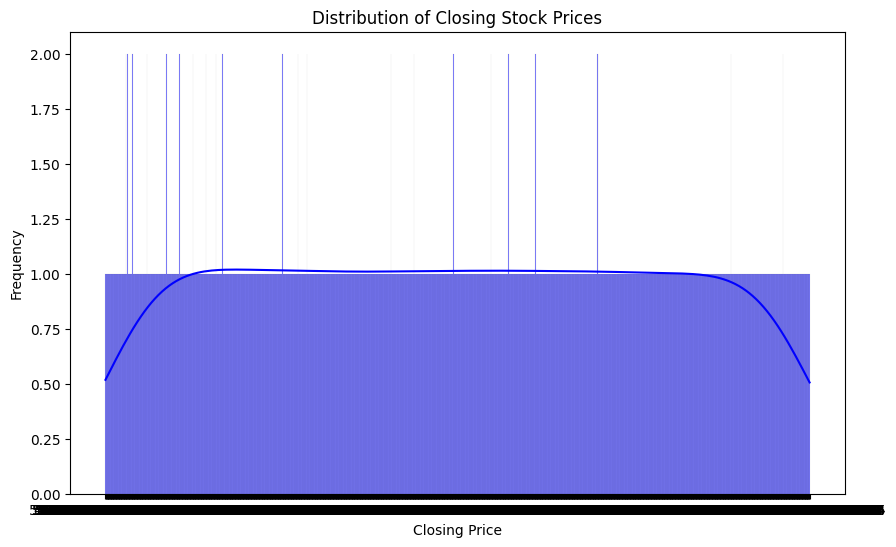

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(nvidia_stock['Close'], kde=True, bins=30, color='blue')
plt.title('Distribution of Closing Stock Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


### 5: Trend Analysis of Stock High Prices  
Visualize the trend of the `High` prices over time to observe how the maximum prices evolved during the trading period.





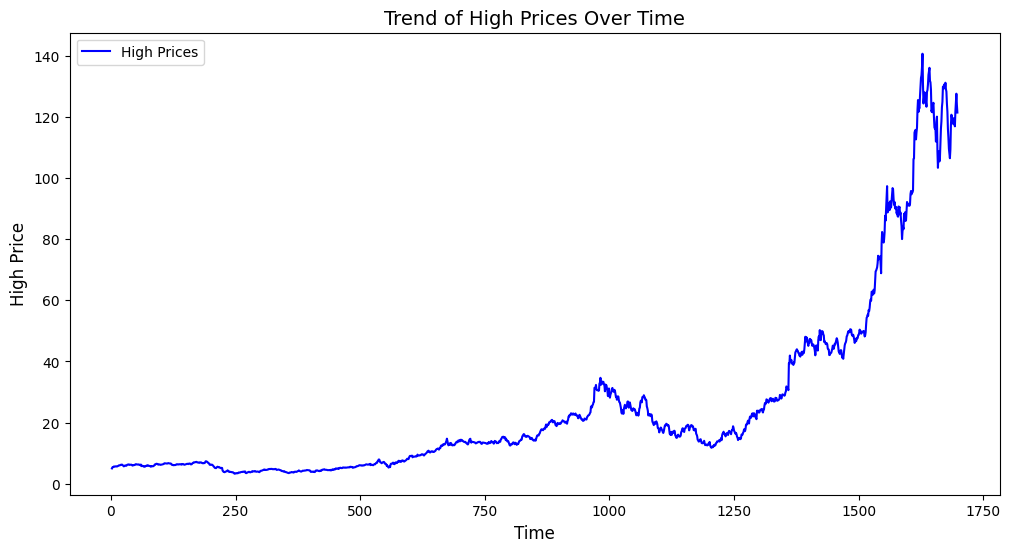

In [6]:
# Ensure High column is numeric
nvidia_stock['High'] = pd.to_numeric(nvidia_stock['High'], errors='coerce')
nvidia_stock.dropna(subset=['High'], inplace=True)  # Drop rows with invalid High values

# Plot High Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(nvidia_stock.index, nvidia_stock['High'], label='High Prices', color='blue')
plt.title('Trend of High Prices Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('High Price', fontsize=12)
plt.legend()
plt.show()


### 6: Comparison Between High and Low Prices  
Analyze the relationship between `High` and `Low` prices by plotting them together over time.





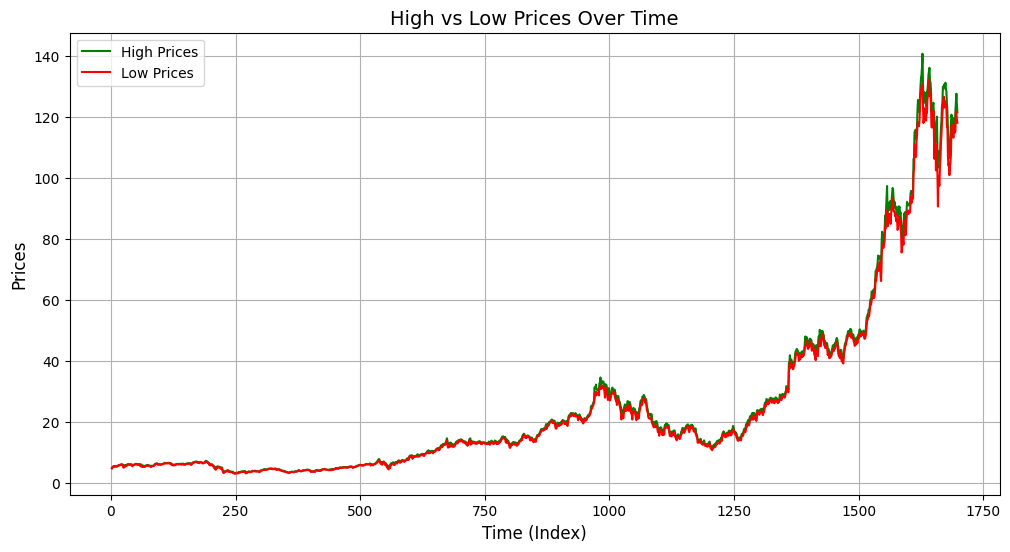

In [7]:
# Ensure 'High' and 'Low' columns are numeric
nvidia_stock['High'] = pd.to_numeric(nvidia_stock['High'], errors='coerce')
nvidia_stock['Low'] = pd.to_numeric(nvidia_stock['Low'], errors='coerce')

# Drop rows with NaN values (optional, depends on your data)
nvidia_stock.dropna(subset=['High', 'Low'], inplace=True)

# Plot High vs. Low Prices
plt.figure(figsize=(12, 6))
plt.plot(nvidia_stock.index, nvidia_stock['High'], label='High Prices', color='green')
plt.plot(nvidia_stock.index, nvidia_stock['Low'], label='Low Prices', color='red')
plt.title('High vs Low Prices Over Time', fontsize=14)
plt.xlabel('Time (Index)', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.legend()
plt.grid()
plt.show()


###  7: Moving Average of Closing Prices  
Calculate and visualize a moving average for `Close` prices to identify trends and fluctuations over time.




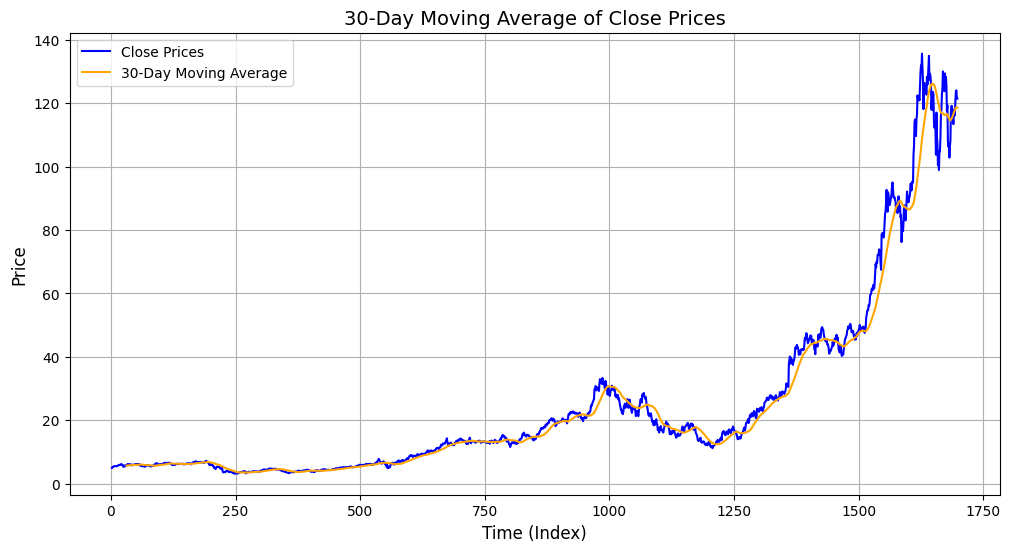

In [8]:
# Ensure 'Close' column is numeric
nvidia_stock['Close'] = pd.to_numeric(nvidia_stock['Close'], errors='coerce')

# Drop rows with NaN values in 'Close' column
nvidia_stock.dropna(subset=['Close'], inplace=True)

# Calculate Moving Averages
nvidia_stock['MA_30'] = nvidia_stock['Close'].rolling(window=30).mean()

# Plot Moving Average
plt.figure(figsize=(12, 6))
plt.plot(nvidia_stock.index, nvidia_stock['Close'], label='Close Prices', color='blue')
plt.plot(nvidia_stock.index, nvidia_stock['MA_30'], label='30-Day Moving Average', color='orange')
plt.title('30-Day Moving Average of Close Prices', fontsize=14)
plt.xlabel('Time (Index)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid()
plt.show()


### 8: Volume vs. Price Relationship  
Analyze the relationship between `Volume` and `Close` prices using a scatter plot.





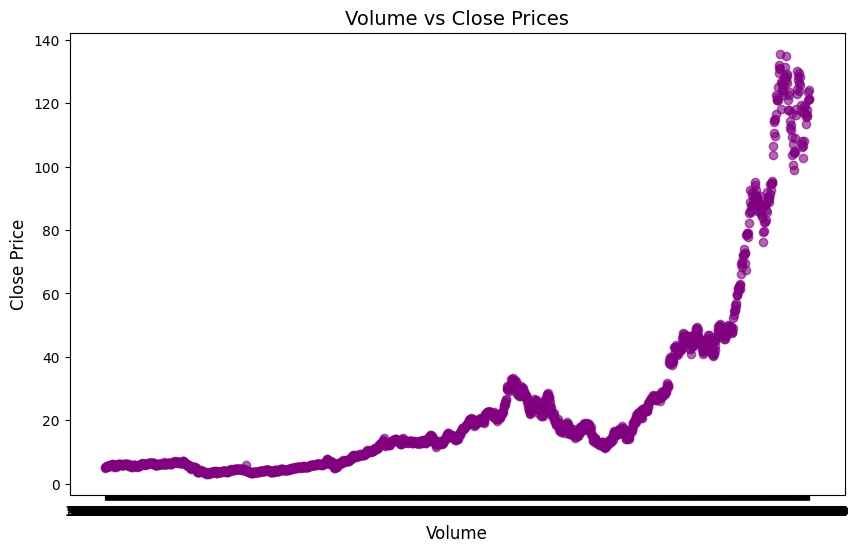

In [9]:
# Scatter Plot: Volume vs Close Price
plt.figure(figsize=(10, 6))
plt.scatter(nvidia_stock['Volume'], nvidia_stock['Close'], color='purple', alpha=0.6)
plt.title('Volume vs Close Prices', fontsize=14)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()


### 9: Volatility Analysis (High-Low Range)  
Calculate the volatility as the difference between `High` and `Low` prices and visualize it over time.





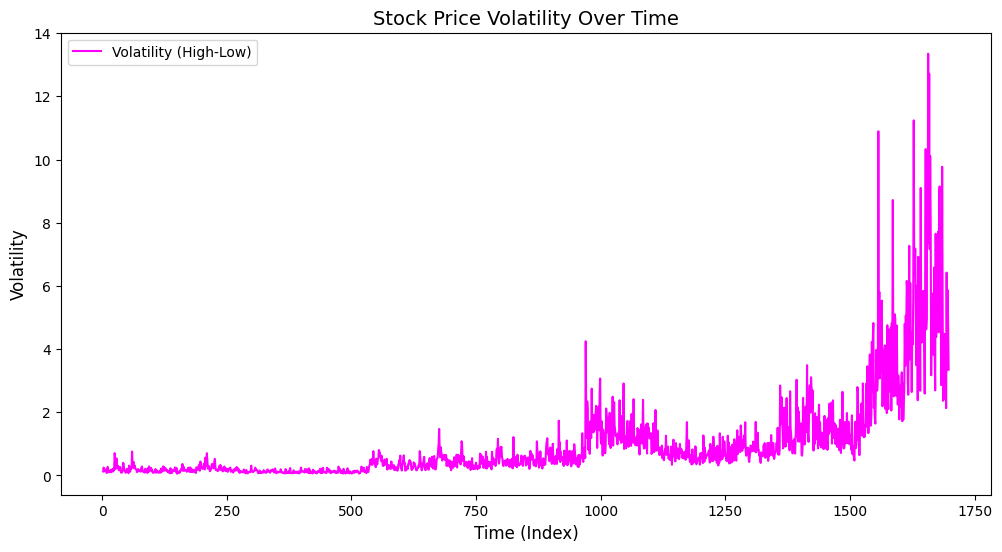

In [10]:
# Calculate Volatility
nvidia_stock['Volatility'] = nvidia_stock['High'] - nvidia_stock['Low']

# Plot Volatility Over Time
plt.figure(figsize=(12, 6))
plt.plot(nvidia_stock.index, nvidia_stock['Volatility'], label='Volatility (High-Low)', color='magenta')
plt.title('Stock Price Volatility Over Time', fontsize=14)
plt.xlabel('Time (Index)', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend()
plt.show()


### 10: Box Plot of Closing Prices by Volume Quartiles  
Create a box plot to understand the distribution of `Close` prices across different volume quartiles.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


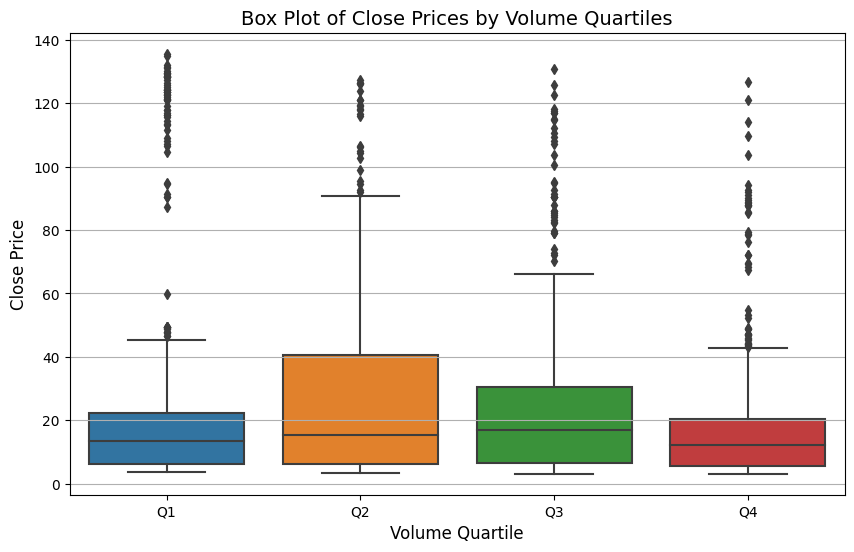

In [11]:
# Ensure 'Volume' column is numeric
nvidia_stock['Volume'] = pd.to_numeric(nvidia_stock['Volume'], errors='coerce')

# Drop rows with NaN values in 'Volume' column
nvidia_stock.dropna(subset=['Volume'], inplace=True)

# Divide Volume into Quartiles
nvidia_stock['Volume_Quartile'] = pd.qcut(nvidia_stock['Volume'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Box Plot of Close Prices by Volume Quartiles
plt.figure(figsize=(10, 6))
sns.boxplot(data=nvidia_stock, x='Volume_Quartile', y='Close')
plt.title('Box Plot of Close Prices by Volume Quartiles', fontsize=14)
plt.xlabel('Volume Quartile', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(axis='y')
plt.show()
